## selectROI로 관심영역 지정하여 새창띄우기 - 복습1

In [1]:
import cv2
import numpy as np

In [3]:
img=cv2.imread("./img/sunset.jpg")
x,y,w,h=cv2.selectROI("img", img, False)

if w and h: #w와 h가 존재한다면..
    roi=img[y:y+h, x:x+w]
    cv2.imshow("sunset_img", roi)
    cv2.moveWindow("sunset_img", 0,0)

cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## BGR을 그레이 스케일로 변환함

In [2]:
img = cv2.imread("./img/girl.jpg")
img2 = img.astype(np.uint16) #dtype변경
b,g,r = cv2.split(img2)
gray1 = ((b+g+r)/3).astype(np.uint8) #평균값 연산후 dtype변경

gray2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #BGR을 그레이스케일로 변경함(색변환하기 convert cvtColor)
cv2.imshow("original", img)
cv2.imshow("gray1", gray1)
cv2.imshow("gray2",gray2)
cv2.waitKey(0)
cv2.destroyAllWindows()

## BGR에서 HSV로 변환(채도, 명도값)

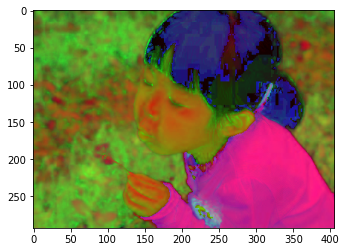

In [2]:
import matplotlib.pyplot as plt
img = cv2.imread("./img/girl.jpg")

gray2 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) #BGR을 그레이스케일로 변경함(색변환하기 convert cvtColor)
plt.imshow(gray2[:,:,::-1])
cv2.waitKey(0)
cv2.destroyAllWindows()

## HSV

In [8]:
red_bgr=np.array([[[0,0,255]]], dtype = np.uint8) #빨강값만 가지는. 픽셀
blue_bgr=np.array([[[255,0,0]]], dtype = np.uint8)
green_bgr=np.array([[[0,255,0]]], dtype = np.uint8)
yellow_bgr=np.array([[[0,255,255]]], dtype = np.uint8)

#BGR 컬러 스페이스는 HSV 컬러스페이스로 변환함
red_hsv = cv2.cvtColor(red_bgr, cv2.COLOR_BGR2HSV)
blue_hsv = cv2.cvtColor(blue_bgr, cv2.COLOR_BGR2HSV)
green_hsv = cv2.cvtColor(green_bgr, cv2.COLOR_BGR2HSV)
yellow_hsv = cv2.cvtColor(yellow_bgr, cv2.COLOR_BGR2HSV)

print("red :", red_hsv)
print("blue: ",blue_hsv)
print("green:", green_hsv)
print("yellow: ", yellow_hsv)

red : [[[  0 255 255]]]
blue:  [[[120 255 255]]]
green: [[[ 60 255 255]]]
yellow:  [[[ 30 255 255]]]


## YUV

In [5]:
dark = np.array([[[0,0,0]]], dtype = np.uint8)
middle = np.array([[[127,127,127]]], dtype = np.uint8)
bright = np.array([[[225,225,225]]], dtype = np.uint8) #BGR 컬러 스페이스로 세 가지 밝기의 픽셀 설정함

#BRG 컬러 스페이스를  YUV 스페이스로 변환함
dark_yuv = cv2.cvtColor(dark, cv2.COLOR_BGR2YUV)
middle_yuv = cv2.cvtColor(middle, cv2.COLOR_BGR2YUV)
bright_yuv = cv2.cvtColor(bright, cv2.COLOR_BGR2YUV)

print("dark:", dark_yuv)
print("middle:", middle_yuv)
print("bright:", bright_yuv)

dark: [[[  0 128 128]]]
middle: [[[127 128 128]]]
bright: [[[225 128 128]]]


## BGR에서 YUV로 변환함(밝기를 표현함)

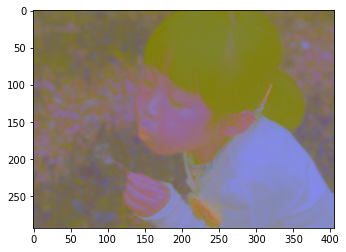

In [6]:
import matplotlib.pyplot as plt
img = cv2.imread("./img/girl.jpg")

gray2 = cv2.cvtColor(img, cv2.COLOR_BGR2YUV) #BGR을 그레이스케일로 변경함(색변환하기 convert cvtColor)
plt.imshow(gray2[:,:,::-1])
cv2.waitKey(0)
cv2.destroyAllWindows()

## 스레시홀딩

127.0


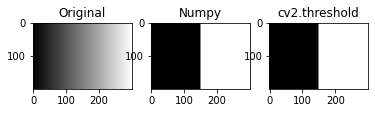

In [9]:
img = cv2.imread("./img/gray_gradient.jpg")

#numpy 연산으로 바이너리 이미지 만들기
thresh_up = np.zeros_like(img)
thresh_up[img>127] =255

#opencv함수 사용
ret, thresh_cv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
print(ret)

#원본과 결과물 출력
imgs = {"Original":img, "Numpy" : thresh_up, "cv2.threshold":thresh_cv}
for i, (key, value) in enumerate(imgs.items()):
    plt.subplot(1,3,i+1)
    plt.title(key)
    plt.imshow(value, cmap="gray")
plt.show()

127.0


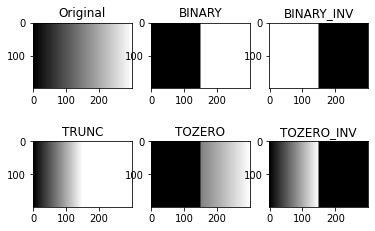

In [12]:
# 스레드 플래스 실습

img = cv2.imread("./img/gray_gradient.jpg", cv2.IMREAD_GRAYSCALE)

#opencv함수 사용
_, t_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, t_bininv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
_, t_truc = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
_, t_2zr = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
_, t_2zrinv = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)
print(ret)

#원본과 결과물 출력
imgs = {"Original":img, "BINARY" : t_bin, "BINARY_INV": t_bininv,"TRUNC":t_truc,"TOZERO":t_2zr,"TOZERO_INV":t_2zrinv}
for i, (key, value) in enumerate(imgs.items()):
    plt.subplot(2,3,i+1)
    plt.title(key)
    plt.imshow(value, cmap="gray")
plt.show()

# 오츠의 알고리즘

otsu thresh: 131.0


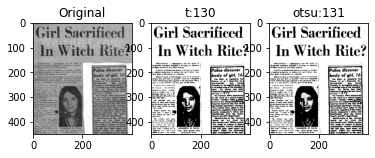

In [16]:
img = cv2.imread("./img/scaned_paper.jpg", cv2.IMREAD_GRAYSCALE)

#경계값을 130으로 지정함
_, t_130 = cv2.threshold(img, 130, 255, cv2.THRESH_BINARY)

#경계값을 지정하지 않고 오츠의 알고리즘 선택
t, t_otsu = cv2.threshold(img, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print("otsu thresh:", t)

#원본과 결과물 출력
imgs = {"Original":img, "t:130" : t_130, "otsu:%d"%t: t_otsu}
for i, (key, value) in enumerate(imgs.items()):
    plt.subplot(1,3,i+1)
    plt.title(key)
    plt.imshow(value, cmap="gray")
plt.show()


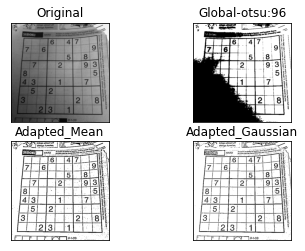

In [20]:
## 적응형 스레시홀드

blk_size = 9
C = 5
img = cv2.imread("./img/sudoku.png", cv2.IMREAD_GRAYSCALE)

#오츠의 알고리즘으로 단일 경계 값을 전체 이미지에 적용함
ret, th1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU) #일반적인 오츠 알고리즘

#적응형 스레시홀드를 평균과 가우시안 분포로 각각 적용함
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blk_size, C)

th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blk_size, C)

#원본과 결과물 출력
imgs = {"Original":img, "Global-otsu:%d" % ret: th1, "Adapted_Mean": th2,"Adapted_Gaussian":th3}
for i, (key, value) in enumerate(imgs.items()):
    plt.subplot(2,2,i+1)
    plt.title(key)
    plt.imshow(value, cmap="gray")
    plt.xticks([])
    plt.yticks([])
plt.show()

# 이미지 연산

In [23]:
a = np.uint8([[200,50]])
b = np.uint8([[100,100]])

#numpy 배열연산
add1 = a+b
sub1 = a-b
mul1 = a*2
div1 = a/3

#OpenCV API을 이용한 연산
add2 = cv2.add(a,b)
sub2 = cv2.subtract(a,b)
mul2 = cv2.multiply(a,2)
div2 = cv2.divide(a,3)

print(add1, add2)
print(sub1, sub2)
print(mul1, mul2)
print(div1, div2)

[[ 44 150]] [[255 150]]
[[100 206]] [[100   0]]
[[144 100]] [[255 100]]
[[66.66666667 16.66666667]] [[67 17]]


In [26]:
## mask와 누적할당 연산
a = np.array([[1,2]], dtype = np.uint8)
b = np.array([[10,20]], dtype = np.uint8)
mask = np.array([[1,0]], dtype = np.uint8)

#누적할당과 비교연산
c0 = cv2.add(a,b,None) #[[11 22]]
c1 = cv2.add(a,b,None, mask) #[[11  0]] #mask0인 부분은 연산하지 않음
c2 = cv2.add(a,b,b,mask) #[[11 20]]  누적할당 20을 그대로 갖게됨.(연산의 결과값을 가짐)
c3 = cv2.add(a,b,b.copy(), mask) #[[12 20]]  (연산전 상태를 그대로 유지함) mask까지 연삼함
print(c0)
print(c1)
print(c2)
print(c3)

[[11 22]]
[[11  0]]
[[11 20]]
[[12 20]]


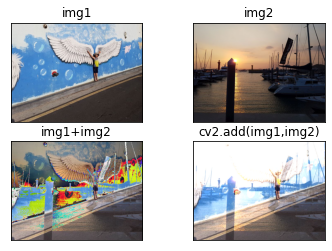

In [28]:
img1 = cv2.imread("./img/wing_wall.jpg")
img2 = cv2.imread("./img/yate.jpg")

#이미지 덧셈
img3 = img1 + img2
img4 = cv2.add(img1, img2)

#원본과 결과물 출력
imgs = {"img1":img1, "img2": img2, "img1+img2": img3,"cv2.add(img1,img2)":img4}
for i, (key, value) in enumerate(imgs.items()):
    plt.subplot(2,2,i+1)
    plt.title(key)
    plt.imshow(value[:,:,::-1])
    plt.xticks([])
    plt.yticks([])
plt.show()

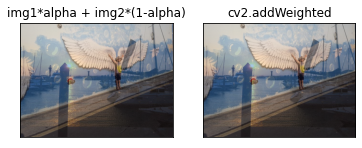

In [30]:
## 50% 알파 블렌딩 가중치(알파)를 활용하여 적절하게 합성하기
alpha = 0.5

img1 = cv2.imread("./img/wing_wall.jpg")
img2 = cv2.imread("./img/yate.jpg")

#수식을 직접 연산하여 알파 블렌딩 적용
blended = img1*alpha + img2*(1-alpha)
blended = blended.astype(np.uint8)


#addWeighted() 함수를 활용하여 알파 블렌딩 적용
dst = cv2.addWeighted(img1,alpha, img2, (1-alpha), 0)


#원본과 결과물 출력
imgs = {"img1*alpha + img2*(1-alpha)":blended, "cv2.addWeighted": dst}
for i, (key, value) in enumerate(imgs.items()):
    plt.subplot(1,2,i+1)
    plt.title(key)
    plt.imshow(value[:,:,::-1])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [9]:
## 트랙바를 알파값으로 지정하여...합성하기

win_name = "Alpha blending"
trackbar_name = "fade"

#트랙바 생성함수 적용
def onChange(x):
    alpha = x/100
    dst = cv2.addWeighted(img1, 1-alpha, img2, alpha, 0)
    cv2.imshow(win_name, dst)
    
#합성 영상 읽시
img1 = cv2.imread("./img/man_face.jpg")
img2 = cv2.imread("./img/lion_face.jpg")

#이미지 표시 및 트랙바 생성
cv2.imshow(win_name, img1)
cv2.createTrackbar(trackbar_name, win_name, 0, 100, onChange)

cv2.waitKey(0)
cv2.destroyAllWindows()

## 비트와이즈 연산

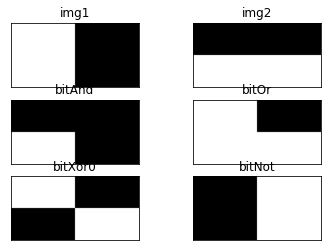

In [15]:
import matplotlib.pylab as plt

#연산에 사용할 이미지 생성
img1 = np.zeros((200,400), dtype = np.uint8)
img2 = np.zeros((200,400), dtype = np.uint8)
img1[:,:200] =  255# 왼쪽은 검은색(0), 오른쪽은 흰색(255)
img2[100:200,:] =  255# 위쪽은 검은색(0), 아래쪽은 흰색(255)

#비트와이즈 연산
bitAnd = cv2.bitwise_and(img1, img2)
bitOr  = cv2.bitwise_or(img1,img2)
bitXor = cv2.bitwise_xor(img1, img2)
bitNot = cv2.bitwise_not(img1)

#원본과 결과물 출력
imgs = {"img1":img1, "img2": img2,"bitAnd": bitAnd,"bitOr" : bitOr, "bitXor0":bitXor,"bitNot":bitNot }
for i, (key, value) in enumerate(imgs.items()):
    plt.subplot(3,2,i+1)
    plt.title(key)
    plt.imshow(value, "gray") #흑백 출력
    plt.xticks([])
    plt.yticks([])
plt.show()

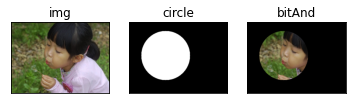

In [19]:
img = cv2.imread("./img/girl.jpg")

#마스크 만들기
mask = np.zeros_like(img)
cv2.circle(mask, (150,140), 100, (255,255,255),-1) #하얀색깔의 원을 채워넣음 mask에 다가.

#마스킹 하기
masked = cv2.bitwise_and(img, mask) #and연산을 활용하여 중복된 부분만 뗴어냄.

#결과 출력
imgs = {"img":img, "circle": mask,"bitAnd": masked}
for i, (key, value) in enumerate(imgs.items()):
    plt.subplot(1,3,i+1)
    plt.title(key)
    plt.imshow(value[:,:,::-1])
    plt.xticks([])
    plt.yticks([])
plt.show()